In [96]:
import numpy as np
import definitionsFits as defs
import matplotlib.pyplot as plt
import cmath
import os
import scipy.special as spcl
import pylab
import differentFitting as diffFit
import scipy.optimize as sopt

%matplotlib inline

def alphaOne(omega, bA, bB, bC, bD, bE, bF):
    termOne = bA / (omega - bB)
    termTwo = bC * np.exp(-bD * np.power(omega - bE, 2.0))
    return termOne + termTwo + bF

def alphaThree(omega, bA, bB, bC, bD, bE, bF, bG, bH, bI):
    termOne = bA / (omega - bB)
    termTwo = bC * np.exp(-bD * np.power(omega - bE, 2.0))
    termThree = bF * np.exp(-bG * np.power(omega - bH, 2.0))
    return termOne + termTwo + termThree + bI

(-1, 1)

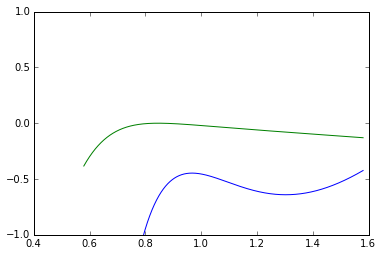

In [97]:
plt.plot(defs.omega_dip, alphaOne(defs.omega_dip,-9.81535556e+00,   3.13975075e-01,   4.94111384e+02,
          4.29958163e-01,  -2.09667678e+00,   5.85035181e+00), defs.omega_dip, alphaThree(defs.omega_dip,\
          3.26519717e-01,  -3.86939149e-01,  -6.38185123e+00,
          9.69371148e+00,   6.33599497e-02,  -1.60485987e-01,
         -1.36571022e-01,   1.15095946e-02,  -7.14781666e-02
          ))
pylab.ylim([-1, 1])

In [98]:
def presetAlphas(omegaV, alpha_free):
                       
    dawsarg_1st = defs.T*(defs.delta_m[0] - omegaV)
    dawsarg_3rd = defs.T*(defs.delta_m[1] - omegaV)
    alpha1f = alphaOne(defs.omega_dip,-9.81535556e+00,   3.13975075e-01,   4.94111384e+02,
          4.29958163e-01,  -2.09667678e+00,   5.85035181e+00)
    alpha3f = alphaThree(defs.omega_dip,\
          3.26519717e-01,  -3.86939149e-01,  -6.38185123e+00,
          9.69371148e+00,   6.33599497e-02,  -1.60485987e-01,
         -1.36571022e-01,   1.15095946e-02,  -7.15781666e-02)
          
    #     alpha1f = fit_dipoles(omegaV, m_1, b_1)
#     alpha3f = fit_dipoles3(omegaV, m_3, b_3)
    real_factor = (alpha1f*np.exp(-alpha_free*defs.T*defs.T*(defs.delta_m[0]-omegaV)\
                    *(defs.delta_m[0]-omegaV)))\
                     + (alpha3f * np.exp(-alpha_free* defs.T * defs.T *\
                    (defs.delta_m[1]-omegaV)*(defs.delta_m[1]-omegaV)))
    imag_factor = (alpha1f*(-2*cmath.sqrt(-1))/\
        (np.sqrt(np.pi))*spcl.dawsn(np.sqrt(alpha_free)*dawsarg_1st)) + \
            (alpha3f*((-2*cmath.sqrt(-1))/\
                (np.sqrt(np.pi)))*spcl.dawsn(np.sqrt(alpha_free)*dawsarg_3rd))
    domegaV = np.gradient(omegaV)
    phase_fit = np.arctan(np.imag(imag_factor)/np.real(real_factor))
    
    dphi_fit = np.gradient(phase_fit, domegaV)
    return dphi_fit  


In [99]:
sampleOne = presetAlphas(defs.omega_dip, 5.62392912e-03)

(-10, 10)

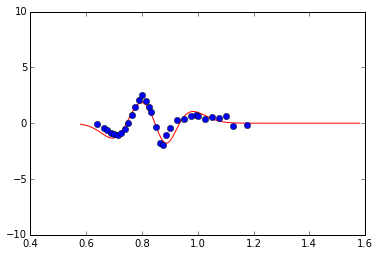

In [100]:
plt.plot(defs.omega_dip, sampleOne, 'r-', diffFit.x, diffFit.y, 'bo')
pylab.ylim([-10, 10])

In [101]:
sampleOne

array([-0.09084962, -0.09085281, -0.09085919, ...,  0.        ,
        0.        ,  0.        ])

In [102]:
def fitAlphas(omegaV, b1A, b1B, b1C, b1D, b1E, b1F, \
		b3A, b3B, b3C, b3D, b3E, b3F, b3G, b3H, b3I, alpha_free):                       
    dawsarg_1st = defs.T*(defs.delta_m[0] - omegaV)
    dawsarg_3rd = defs.T*(defs.delta_m[1] - omegaV)
    alpha1f = alphaOne(omegaV, b1A, b1B, b1C, b1D, b1E, b1F)
    alpha3f = alphaThree(omegaV, b3A, b3B, b3C, b3D, b3E, b3F, b3G, b3H, b3I)          
    real_factor = (alpha1f*np.exp(-alpha_free*defs.T*defs.T*(defs.delta_m[0]-omegaV)\
                    *(defs.delta_m[0]-omegaV)))\
                     + (alpha3f * np.exp(-alpha_free* defs.T * defs.T *\
                    (defs.delta_m[1]-omegaV)*(defs.delta_m[1]-omegaV)))
    imag_factor = (alpha1f*(-2*cmath.sqrt(-1))/\
        (np.sqrt(np.pi))*spcl.dawsn(np.sqrt(alpha_free)*dawsarg_1st)) + \
            (alpha3f*((-2*cmath.sqrt(-1))/\
                (np.sqrt(np.pi)))*spcl.dawsn(np.sqrt(alpha_free)*dawsarg_3rd))
    domegaV = np.gradient(omegaV)
    phase_fit = np.arctan(np.imag(imag_factor)/np.real(real_factor))
    
    dphi_fit = np.gradient(phase_fit, domegaV)
    return dphi_fit 

In [103]:
p0_test = np.array([ -9.81535485e+00,   3.13972797e-01,   4.94111384e+02,
          4.29838499e-01,  -2.09667026e+00,   5.85035196e+00,
          3.26147227e-01,  -3.87039586e-01,  -6.38185284e+00,
          9.69370558e+00,   6.33642758e-02,  -1.60981140e-01,
         -1.36624353e-01,   1.14918371e-02,  -7.19300239e-02,
          5.58729693e-03])

In [104]:
Path = '/Users/cgoldsmith/Desktop/text_files_data'
os.chdir(Path)
data = np.loadtxt('TDSE_3fs.txt')
x = data[:, 0]
y = data[:, 4]
sopt.curve_fit(fitAlphas, x, y,\
p0 = p0_test, bounds=(-20,700), max_nfev=10000, check_finite=False)

(array([ -9.81535494e+00,   3.14053010e-01,   4.94111384e+02,
          4.30146679e-01,  -2.09667239e+00,   5.85035180e+00,
          3.26531315e-01,  -3.86932516e-01,  -6.38185017e+00,
          9.69371461e+00,   6.33573641e-02,  -1.60493177e-01,
         -1.36577603e-01,   1.15083895e-02,  -7.14802190e-02,
          6.49634984e-03]),
 array([[  1.68776632e+12,   1.94579846e+08,  -2.91183339e+13,
          -1.55417830e+10,  -9.60821015e+10,  -1.05132686e+12,
           2.19916269e+10,  -1.18901750e+11,   1.36578764e+12,
           8.07456266e+10,   5.78973890e+09,  -6.48823409e+10,
           5.95452823e+10,   2.55213368e+11,   5.85130949e+10,
          -4.96971319e+06],
        [  1.94579846e+08,   4.75591057e+05,  -2.60535986e+10,
           1.15186533e+06,   1.86295947e+07,  -1.59018465e+08,
          -1.10903817e+07,   8.65982821e+06,   1.94523125e+08,
           9.61443527e+06,   2.08339106e+06,  -1.57135336e+07,
           8.41386300e+06,  -2.46404382e+07,   2.42933235e+07,
    

(-5, 5)

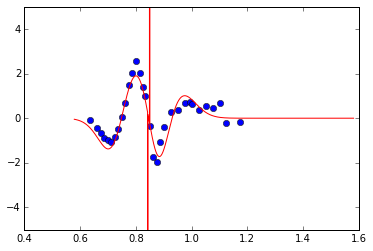

In [111]:
plt.plot(x, y, 'bo', defs.omega_dip, fitAlphas(defs.omega_dip, -9.81535494e+00,   3.14053010e-01,   4.94111384e+02,
          4.30146679e-01,  -2.09667239e+00,   5.85035180e+00,
          3.26531315e-01,  -3.86932516e-01,  -6.38185017e+00,
          9.69371461e+00,   6.33573641e-02,  -1.60493177e-01,
         -1.36577603e-01,   1.15083895e-02,  -7.14802190e-02,
          6.49634984e-03), 'r-')

pylab.ylim([-5, 5])